In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
# Import Data
diabetes = pd.read_csv('./dataset/pima-indians-diabetes.csv')

diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
# Clean the Data
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
# List of Columns to Normalize
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']

In [5]:
# Normalize Values
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min())/ (x.max() - x.min()))

In [6]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [7]:
# Feature Column Objects for Estimator
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
# Create Feature Columns for Input to Estimator
num_preg = tf.feature_column.numeric_column('Number_pregnant')
gluc_conc = tf.feature_column.numeric_column('Glucose_concentration')
bp = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [9]:
# Create Categorical Features
# Two Methods: Vocabulary List & Hash Buckets
# Categorical Feature for Group: A, B, C , D
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])

In [10]:
# Hash Buckets
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [11]:
# Convert Continuous Column to Categorical Column "Age"
import matplotlib.pyplot as plt
%matplotlib inline

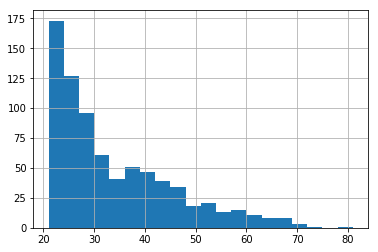

In [12]:
diabetes['Age'].hist(bins=20)

In [13]:
# Bucket Ages Together
# Convert Continuous Column to Categorical Column "Age"
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [14]:
print(age_bucket)

_BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))


In [15]:
# Group together all Features
feat_cols = [num_preg, gluc_conc, bp, triceps, insulin ,bmi, pedigree, assigned_group, age_bucket]

In [16]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [17]:
# Final Features
X_data = diabetes.drop('Class', axis=1)

In [18]:
# Final Labels
y_data = diabetes['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20)

In [20]:
# Create the Estimator
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_keep_checkpoint_max': 5, '_session_config': None, '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpnt0qut0y', '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [21]:
# Input Function
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [22]:
# Validation / Test Function
# Input Function
eval_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size=10, num_epochs=1000, shuffle=False)

In [23]:
# Train the Estimator
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpnt0qut0y/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.931472
INFO:tensorflow:global_step/sec: 360.612
INFO:tensorflow:step = 101, loss = 4.4119983 (0.281 sec)
INFO:tensorflow:global_step/sec: 420.231
INFO:tensorflow:step = 201, loss = 5.8437343 (0.236 sec)
INFO:tensorflow:global_step/sec: 441.627
INFO:tensorflow:step = 301, loss = 7.332447 (0.228 sec)
INFO:tensorflow:global_step/sec: 417.394
INFO:tensorflow:step = 401, loss = 5.8918753 (0.237 sec)
INFO:tensorflow:global_step/sec: 386.523
INFO:tensorflow:step = 501, loss = 5.969016 (0.259 sec)
INFO:tensorflow:global_step/sec: 397.997
INFO:tensorflow:step = 601, loss = 7.060868 (0.251 sec)
INFO:tensorflow:global_step/sec: 419.939
INFO:tensorflow:step = 701, loss = 3.9397674 (0.238 sec)
INFO:tensorflow:global_step/sec: 395.647
INFO:tensorflow:step = 801, loss = 5.7204914 (0.253 sec)
INFO:tensorflow:global_step/sec: 399.697
INFO:tensorflow:s

In [24]:
# Evaluate Model
model.evaluate(input_fn=eval_func)

INFO:tensorflow:Starting evaluation at 2018-01-15-19:18:26
INFO:tensorflow:Restoring parameters from /tmp/tmpnt0qut0y/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-15-19:19:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.6753247, auc = 0.78288466, auc_precision_recall = 0.6573043, average_loss = 0.53670514, global_step = 1000, label/mean = 0.32467532, loss = 5.3670516, prediction/mean = 0.39657524


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.6753247,
 'auc': 0.78288466,
 'auc_precision_recall': 0.6573043,
 'average_loss': 0.53670514,
 'global_step': 1000,
 'label/mean': 0.32467532,
 'loss': 5.3670516,
 'prediction/mean': 0.39657524}

In [25]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size=10, num_epochs=1, shuffle=False)

In [26]:
# Make Predictions
prediction = model.predict(input_fn=pred_input_func)

In [27]:
list(prediction)

INFO:tensorflow:Restoring parameters from /tmp/tmpnt0qut0y/model.ckpt-1000


[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.22320381], dtype=float32),
  'logits': array([-1.2470927], dtype=float32),
  'probabilities': array([0.77679616, 0.22320381], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5558931], dtype=float32),
  'logits': array([0.22451067], dtype=float32),
  'probabilities': array([0.44410694, 0.5558931 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.1816631], dtype=float32),
  'logits': array([-1.5051203], dtype=float32),
  'probabilities': array([0.8183369 , 0.18166308], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.14269668], dtype=float32),
  'logits': array([-1.7930706], dtype=float32),
  'probabilities': array([0.85730326, 0.14269666], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=ob